In [89]:
import pandas as pd
import numpy as np

<H1> Chargement des données 

In [92]:
df1=pd.read_csv('immo/TGV.csv', sep = ";")
df1

,Code INSEE,Annee,Nb_mutations,NbMaisons,NbApparts,PrixMoyen,Prixm2Moyen,SurfaceMoy,Commune,geo_point_2d,Nom_gare,voyageurs,code_ligne,TGV
0,01001,2014,10,10.0,0.0,180207.000,1708.900,107.400000,L'ABERGEMENT-CLEMENCIAT,"46.153425521369456, 4.926113542231843",NaN,NaN,NaN,Pas de gare
1,01002,2014,3,3.0,0.0,107930.000,1338.000,80.333333,L'ABERGEMENT-DE-VAREY,"46.009187877601306, 5.428016963625987",NaN,NaN,NaN,Pas de gare
2,01004,2014,125,77.0,48.0,164579.392,1946.432,85.872000,AMBERIEU-EN-BUGEY,"45.96084751144621, 5.372925777699918",Ambérieu,O,889000.0,Gare voyageurs non TGV
3,01004,2014,125,77.0,48.0,164579.392,1946.432,85.872000,AMBERIEU-EN-BUGEY,"45.96084751144621, 5.372925777699918",Ambérieu,O,890000.0,Gare voyageurs non TGV
4,01004,2014,125,77.0,48.0,164579.392,1946.432,85.872000,AMBERIEU-EN-BUGEY,"45.96084751144621, 5.372925777699918",Ambérieu,O,883000.0,Gare voyageurs non TGV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237461,95678,2021,17,14.0,3.0,275319.400,3911.765,77.470590,VILLIERS-ADAM,"49.07028882476772, 2.239508718709138",NaN,NaN,NaN,Pas de gare
237462,95680,2021,186,67.0,119.0,174900.700,2575.919,69.456990,VILLIERS-LE-BEL,"49.00844941568135, 2.403856040394518",NaN,NaN,NaN,Pas de gare
237463,95682,2021,3,3.0,0.0,256666.700,2606.000,98.333330,VILLIERS-LE-SEC,"49.07430886817081, 2.386889599838927",NaN,NaN,NaN,Pas de gare
237464,95690,2021,2,2.0,0.0,338200.000,3532.000,98.500000,WY-DIT-JOLI-VILLAGE,"49.09581977581952, 1.8250288330776692",NaN,NaN,NaN,Pas de gare


<H1> création des variables catégorielles 

In [94]:
df1['PasGare'] = df1['TGV'].apply(lambda x: 1 if x == 'Pas de gare' else 0)
df1['GareNonTGV'] = df1['TGV'].apply(lambda x: 1 if x == 'Gare voyageurs non TGV' else 0)
df1['Gare TGV'] = df1['TGV'].apply(lambda x: 1 if x == 'Gare TGV' else 0)
df1=df1[['NbMaisons','NbApparts','Prixm2Moyen','SurfaceMoy']]
df1['ClassePrix'] = df1['Prixm2Moyen'].apply(lambda x: 0 if x < 700 else 1 if (x > 700 and x < 1100) else 2 if (x > 1100 and x < 1800) else 3 if (x > 1800 and x < 2600) else 4)
df1.dropna(inplace=True)
df1

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_42570/3216027553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ClassePrix'] = df1['Prixm2Moyen'].apply(lambda x: 0 if x < 700 else 1 if (x > 700 and x < 1100) else 2 if (x > 1100 and x < 1800) else 3 if (x > 1800 and x < 2600) else 4)
/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_42570/3216027553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,NbMaisons,NbApparts,Prixm2Moyen,SurfaceMoy,ClassePrix
0,10.0,0.0,1708.900,107.400000,2
1,3.0,0.0,1338.000,80.333333,2
2,77.0,48.0,1946.432,85.872000,3
3,77.0,48.0,1946.432,85.872000,3
4,77.0,48.0,1946.432,85.872000,3
...,...,...,...,...,...
237460,8.0,0.0,2837.125,118.750000,4
237461,14.0,3.0,3911.765,77.470590,4
237462,67.0,119.0,2575.919,69.456990,3
237463,3.0,0.0,2606.000,98.333330,4


<H1> traitement des données abberrantes 

In [95]:

nan_count = df1.apply(lambda x: x.isna().sum())
print(nan_count)
print(df1.dtypes)
df1.head()

NbMaisons      0
NbApparts      0
Prixm2Moyen    0
SurfaceMoy     0
ClassePrix     0
dtype: int64
NbMaisons      float64
NbApparts      float64
Prixm2Moyen    float64
SurfaceMoy     float64
ClassePrix       int64
dtype: object


,NbMaisons,NbApparts,Prixm2Moyen,SurfaceMoy,ClassePrix
0,10.0,0.0,1708.900,107.400000,2
1,3.0,0.0,1338.000,80.333333,2
2,77.0,48.0,1946.432,85.872000,3
3,77.0,48.0,1946.432,85.872000,3
4,77.0,48.0,1946.432,85.872000,3


<H1> distribution du prix du M2

In [96]:
df1['Prixm2Moyen'].describe()

count    237458.000000
mean       1637.866178
std         869.498344
min         330.000000
25%        1108.464311
50%        1452.000000
75%        1922.212464
max       14295.000000
Name: Prixm2Moyen, dtype: float64

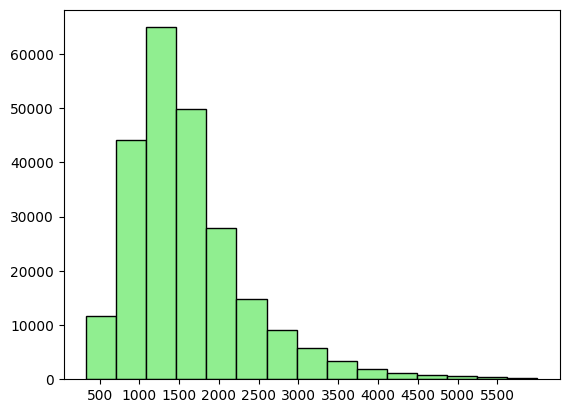

In [97]:
import matplotlib.pyplot as plt

plt.hist(df1['Prixm2Moyen'], range=[330, 6000], color='lightgreen', ec='black', bins=15)
plt.xticks(range(500, 6000,500 ))
plt.show()


<h1> Division en train et test 

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



X = df1.drop(columns=["ClassePrix","Prixm2Moyen"])
y = df1["ClassePrix"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.33,random_state=1)

<H1> ML 

<H3> Poids et Kfolds

In [99]:
from sklearn.model_selection import KFold
from sklearn.utils import class_weight

kf=KFold(n_splits=5, shuffle=False, random_state=None)
poids=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
poids

weight_dict = {np.unique(y)[i]: poids[i] for i in range(len(np.unique(y)))}
weight_dict


{0: 4.248224299065421,
 1: 1.017498081350729,
 2: 0.43842592592592594,
 3: 1.012254246993701,
 4: 1.949228130360206}

<h3> LogisticRegression Multinomial

/Users/alexisrevelle/miniconda3/envs/ml_dupre/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.09      0.94      0.16      3635
           1       0.21      0.15      0.17     15568
           2       0.51      0.22      0.31     35567
           3       0.31      0.15      0.20     15534
           4       0.45      0.34      0.39      8058

    accuracy                           0.24     78362
   macro avg       0.31      0.36      0.25     78362
weighted avg       0.39      0.24      0.26     78362



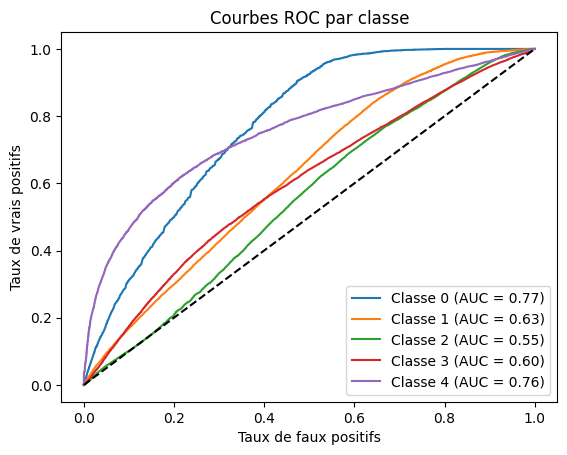

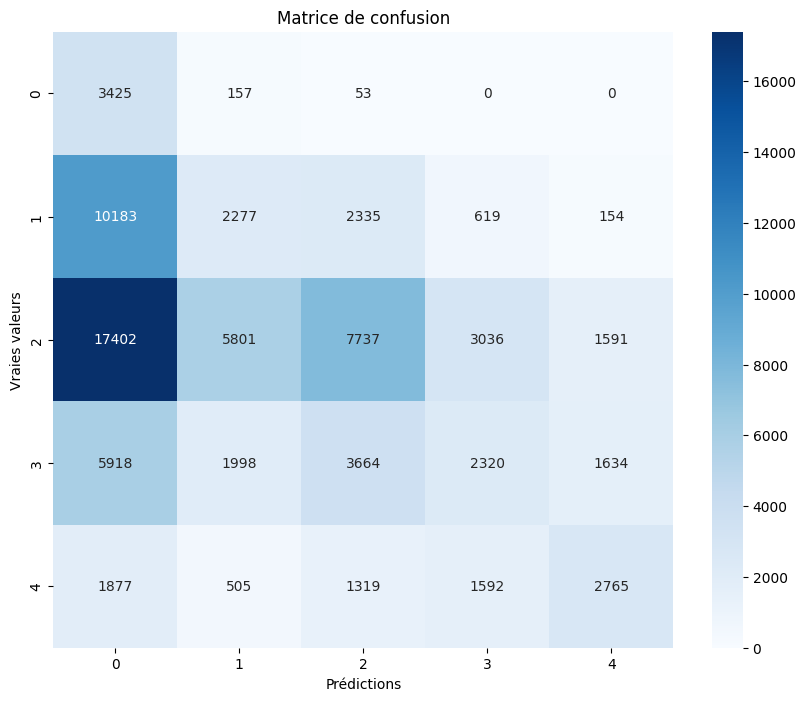

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.calibration import calibration_curve

# initialisation du modèle de régression multinomiale
model = LogisticRegression(multi_class='multinomial', solver='saga',class_weight=weight_dict)

# entrainement
model.fit(X_train, y_train)

# prédictions
y_pred = model.predict(X_test)

# métriques
report = classification_report(y_test, y_pred)
print(report)

# courbes roc et graphs
y_pred_prob = model.predict_proba(X_test)
n_classes = len(model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Classe %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC par classe')
plt.legend(loc='lower right')
plt.show()

# matrice de conf
confusion = confusion_matrix(y_test, y_pred)
labels = model.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()


<H3> Descente de gradient stochastique

In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.calibration import calibration_curve

# initialisation du modèle
model = SGDClassifier(loss='log', max_iter=1000, class_weight=weight_dict)

# entrainement du modèle
model.fit(X_train, y_train)

# prédictions 
y_pred = model.predict(X_test)

# métriques
report = classification_report(y_test, y_pred)
print(report)

# Courbes ROC et graphiques 
y_pred_prob = model.predict_proba(X_test)
n_classes = len(model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Classe %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC par classe')
plt.legend(loc='lower right')
plt.show()

#matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
labels = model.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()


/Users/alexisrevelle/miniconda3/envs/ml_dupre/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.10      0.88      0.18      3635
           1       0.00      0.00      0.00     15568
           2       0.55      0.46      0.50     35567
           3       0.35      0.05      0.09     15534
           4       0.35      0.63      0.45      8058

    accuracy                           0.32     78362
   macro avg       0.27      0.40      0.24     78362
weighted avg       0.36      0.32      0.30     78362



/Users/alexisrevelle/miniconda3/envs/ml_dupre/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexisrevelle/miniconda3/envs/ml_dupre/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexisrevelle/miniconda3/envs/ml_dupre/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

ValueError: Input contains NaN.

<H3> XGBoost

In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00a 0:00:01


In [102]:
df1.ClassePrix.value_counts()
df1['ClassePrix']=df1['ClassePrix'].astype(int)

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_42570/4002882722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ClassePrix']=df1['ClassePrix'].astype(int)


[20:59:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weights" } are not used.

              precision    recall  f1-score   support

           0       0.22      0.00      0.01      3635
           1       0.35      0.02      0.04     15568
           2       0.49      0.94      0.64     35567
           3       0.41      0.09      0.15     15534
           4       0.60      0.41      0.49      8058

    accuracy                           0.49     78362
   macro avg       0.41      0.29      0.27     78362
weighted avg       0.44      0.49      0.38     78362



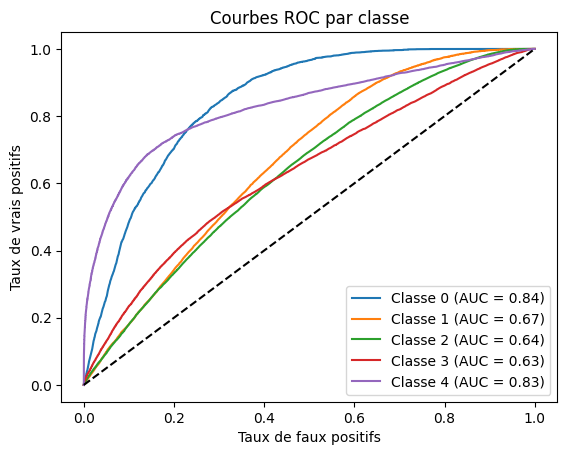

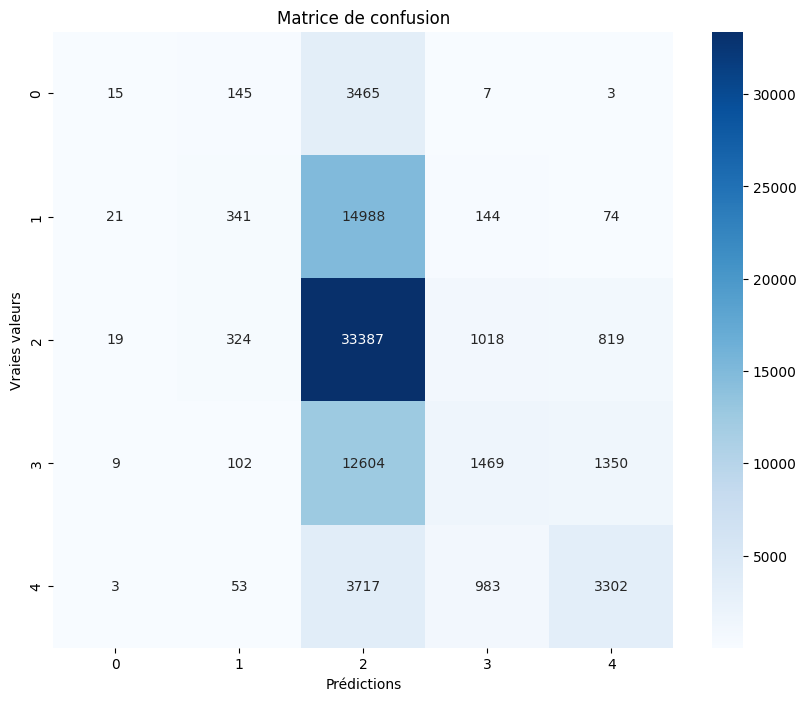

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import xgboost as xgb

# initialisation du modèle 
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)), class_weights=weight_dict)

# application du modèle pour l'entrainement 
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Résultat des métriques 
report = classification_report(y_test, y_pred)
print(report)

# Courbes ROC et graphiques 
y_pred_prob = model.predict_proba(X_test)
n_classes = len(model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Classe %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC par classe')
plt.legend(loc='lower right')
plt.show()

# Matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
labels = model.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

# Sauvegarde du modèle
with open('modele_xgboost.pkl', 'wb') as file:
    pickle.dump(model, file)


<H4> charger le modèle sauvegardé 

In [104]:
with open('modele_xgboost.pkl', 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)


<H3> Optimized XGBoost (RandomSearch) 

[20:59:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:59:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:59:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:59:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[21:00:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[21:00:19] WARNING: /Users/runner/work/xgboost/xgboost/

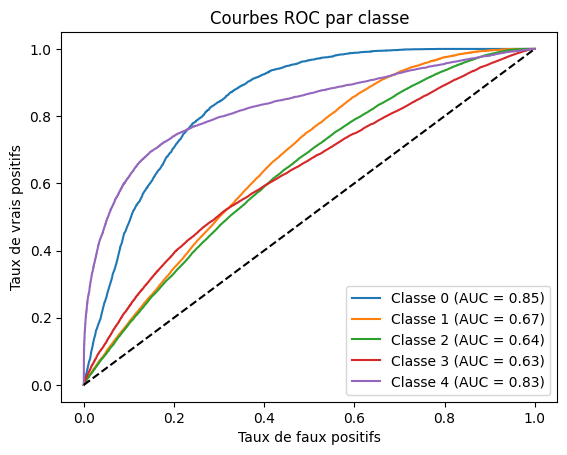

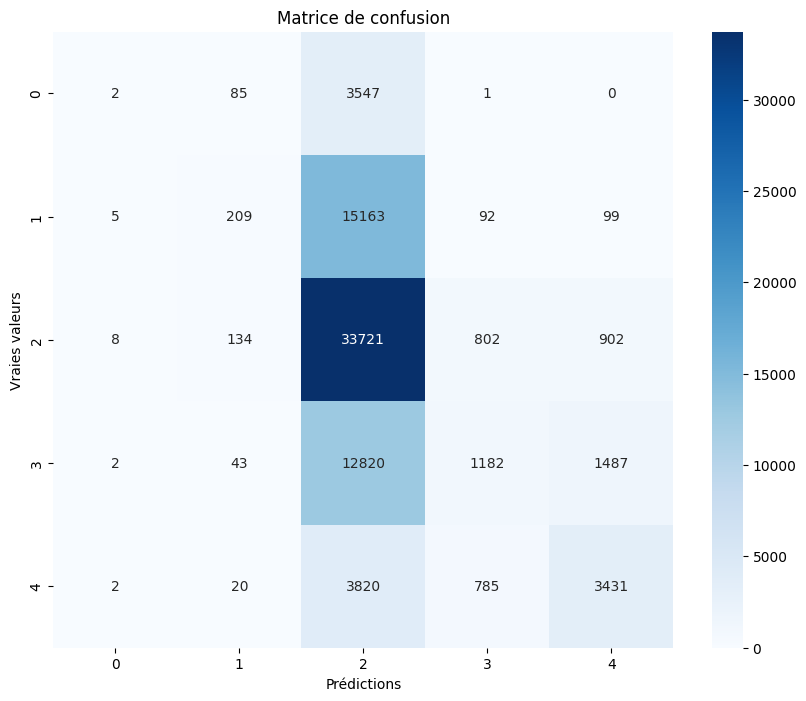

In [106]:
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import xgboost as xgb

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [ 0.1, 0.2],
    'scale_pos_weight' : [weight_dict],
}

# Instancier un modèle XGBoost
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)))

# Effectuer la recherche aléatoire des hyperparamètres
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, random_state=1)
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(random_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculer les métriques usuelles (précision, rappel, score F1, etc.)
report = classification_report(y_test, y_pred)
print(report)

# Calculer les courbes ROC et l'AUC (Area Under Curve) pour chaque classe
y_pred_prob = best_model.predict_proba(X_test)
n_classes = len(best_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Afficher les courbes ROC
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Classe %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC par classe')
plt.legend(loc='lower right')
plt.show()

# Calculer et afficher la matrice de confusion avec Seaborn
confusion = confusion_matrix(y_test, y_pred)
labels = best_model.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()


In [108]:
import pickle

with open('modele_xgboost.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [105]:
### Meilleurs paramètres pour Thomas 
# Meilleurs hyperparamètres:
# {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2}

### A LIRE ###

### légère amélioration au niveau des auc individuels, mais pas au niveau des métriques 

#### RESULTATS RANDOMIZED ###

# Meilleurs hyperparamètres:
#{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2}
#              precision    recall  f1-score   support

#           0       0.38      0.11      0.18      3615
#           1       0.49      0.28      0.35     15256
#           2       0.58      0.84      0.69     35712
#           3       0.56      0.36      0.44     15366
#           4       0.79      0.63      0.70      7783

#    accuracy                           0.58     77732
#   macro avg       0.56      0.45      0.47     77732
#weighted avg       0.57      0.58      0.55     77732